### <center>**Loan Default Prediction- Logistic Regression**

### **Problem Statement**

MyHom is a finance company that lends housing loans at the best and most affordable interest rates to customers. In recent times, the company incurred heavy losses due to loan defaults. Most applicants failed to repay the loan as per the promissory note.


In order to avoid such losses, the company has decided to build a system for identifying the loan defaulters automatically based on data. This will help the company to identify the potential applicants and ensure the smooth running of the entire process.

### **Importing Libraries**

In [2]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [3]:
!pip install -q --upgrade pandas-profiling

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
from sklearn.feature_selection import RFE                           # For feature selection algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

### **Data Acquisition and Description**

Train and Test Data


The train and test set contains the different attributes related to demographic and loan information of the applicants such as age, profession, no. of active loans, loan default in previous loans, and so on. The training set contains the target variable loan_default and you need to predict the target variable in the test set.


| Column Name                            | Description                                               |
| -------------|:-------------                                            :| 
|loan_id|Unique identifier of a loan                                |
|age|Age of the Applicant                                       |
|Education|Applicant Education|
|proof_submitted|Type of proof submitted|
|loan_amount|Loan Amount Disbursed|
|asset_cost|The total asset value of the applicant|
|no_of_loans|No. of the loans taken by the applicant|
|no_of_curr_loans|No. of active loans held by the applicant|
|last_delinq_none|The loan defaulted in at least one of the past loans|
|loan_default (Target Variable)|0/1 indicating if an applicant will default the loan or not|
|||











In [2]:
# Extracting Train Data 
data_train = pd.read_csv('C://Users/Administrator/Desktop/Analytics Vidhya/Loan Prediction Hackathon/TrainData.csv')
data_train.head()


,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.00000,Aadhar,504264,820920,2,2,0,0
1,2,48,1.00000,Aadhar,728556,831444,6,2,0,0
2,3,30,2.00000,VoterID,642936,826092,0,0,0,1
3,4,28,1.00000,Aadhar,746556,930924,0,0,0,0
4,5,29,1.00000,Aadhar,1139880,1902000,0,0,0,0


In [3]:
# Extracting Test Data 
data_test = pd.read_csv('C://Users/Administrator/Desktop/Analytics Vidhya/Loan Prediction Hackathon/TestData.csv')
data_test.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.00000,Aadhar,636936,768240,2,2,0
1,7002,28,1.00000,Aadhar,548988,693060,3,3,0
2,7003,28,1.00000,Aadhar,651756,936600,0,0,0
3,7004,45,2.00000,Aadhar,614676,744840,4,3,0
4,7005,48,1.00000,Aadhar,625236,839400,0,0,0


In [4]:
data_sample = pd.read_csv('C://Users/Administrator/Desktop/Analytics Vidhya/Loan Prediction Hackathon/Sample.csv')
data_sample.shape

(3000, 2)

In [5]:
print('Shape of Train data is : ', data_train.shape)
print('Shape of Test data is : ', data_test.shape)

Shape of Train data is :  (7000, 10)
Shape of Test data is :  (3000, 9)


In [6]:
data_train.info()    # Checking train data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [7]:
data_train.describe()  # Checking train data description 

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.00000,7000.00000,6755.00000,7000.00000,7000.00000,7000.00000,7000.00000,7000.00000,7000.00000
mean,3500.50000,36.09657,1.56195,663355.17257,916299.75086,2.85329,1.37114,0.01329,0.40000
std,2020.87027,7.58770,0.49618,149812.77367,214492.24457,5.47193,2.18928,0.11450,0.48993
min,1.00000,21.00000,1.00000,167880.00000,473352.00000,0.00000,0.00000,0.00000,0.00000
25%,1750.75000,29.00000,1.00000,577788.00000,797901.00000,0.00000,0.00000,0.00000,0.00000
50%,3500.50000,36.00000,2.00000,657108.00000,858426.00000,0.00000,0.00000,0.00000,0.00000
75%,5250.25000,43.00000,2.00000,737364.00000,957675.00000,3.00000,2.00000,0.00000,1.00000
max,7000.00000,50.00000,2.00000,1781376.00000,2419200.00000,109.00000,33.00000,1.00000,1.00000


In [8]:
data_train.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object')

In [9]:
data_test.columns

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none'],
      dtype='object')

In [10]:
data_train.isnull().sum() # check missing values in train data

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [11]:
data_train['proof_submitted'].value_counts()

Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: proof_submitted, dtype: int64

In [12]:
median_edu = data_train['education'].median()

In [13]:
data_train['education'].fillna(median_edu , inplace = True)   # Filling missing value in Education column with median 

In [14]:
# Converting data type from float to int 
data_train['education'] = data_train['education'].astype('int')

In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   loan_id           7000 non-null   int64 
 1   age               7000 non-null   int64 
 2   education         7000 non-null   int32 
 3   proof_submitted   7000 non-null   object
 4   loan_amount       7000 non-null   int64 
 5   asset_cost        7000 non-null   int64 
 6   no_of_loans       7000 non-null   int64 
 7   no_of_curr_loans  7000 non-null   int64 
 8   last_delinq_none  7000 non-null   int64 
 9   loan_default      7000 non-null   int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 519.7+ KB


In [16]:
data_test.isnull().sum()    # check missing values in test data

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [30]:
test_data = data_test.copy()
test_data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.00000,Aadhar,636936,768240,2,2,0
1,7002,28,1.00000,Aadhar,548988,693060,3,3,0
2,7003,28,1.00000,Aadhar,651756,936600,0,0,0
3,7004,45,2.00000,Aadhar,614676,744840,4,3,0
4,7005,48,1.00000,Aadhar,625236,839400,0,0,0


In [31]:
# Filling missing value in Education column with median 
test_data['education'].fillna(test_data['education'].median(skipna=True), inplace=True)

In [32]:
# Converting data type from float to int 
test_data['education'] = test_data['education'].astype('int')

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   loan_id           3000 non-null   int64 
 1   age               3000 non-null   int64 
 2   education         3000 non-null   int32 
 3   proof_submitted   3000 non-null   object
 4   loan_amount       3000 non-null   int64 
 5   asset_cost        3000 non-null   int64 
 6   no_of_loans       3000 non-null   int64 
 7   no_of_curr_loans  3000 non-null   int64 
 8   last_delinq_none  3000 non-null   int64 
dtypes: int32(1), int64(7), object(1)
memory usage: 199.3+ KB


In [34]:
# Encoding Categorical Features in test data 
testing = pd.get_dummies(test_data)


In [36]:
testing.head()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_Aadhar,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,7001,29,1,636936,768240,2,2,0,1,0,0,0,0
1,7002,28,1,548988,693060,3,3,0,1,0,0,0,0
2,7003,28,1,651756,936600,0,0,0,1,0,0,0,0
3,7004,45,2,614676,744840,4,3,0,1,0,0,0,0
4,7005,48,1,625236,839400,0,0,0,1,0,0,0,0


In [37]:
final_test = testing 
final_test.head()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_Aadhar,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,7001,29,1,636936,768240,2,2,0,1,0,0,0,0
1,7002,28,1,548988,693060,3,3,0,1,0,0,0,0
2,7003,28,1,651756,936600,0,0,0,1,0,0,0,0
3,7004,45,2,614676,744840,4,3,0,1,0,0,0,0
4,7005,48,1,625236,839400,0,0,0,1,0,0,0,0


In [38]:
loan_default= data_train['loan_default'].value_counts()
loan_default

0    4200
1    2800
Name: loan_default, dtype: int64

**What % of defaulter and non defaulter are present ?**

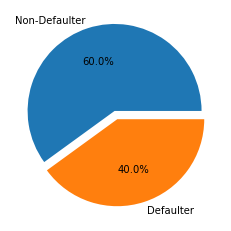

In [39]:
plt.pie(x=loan_default,labels=['Non-Defaulter','Defaulter'],explode = [0.05,0.05],autopct= '%3.1f%%')
plt.show()

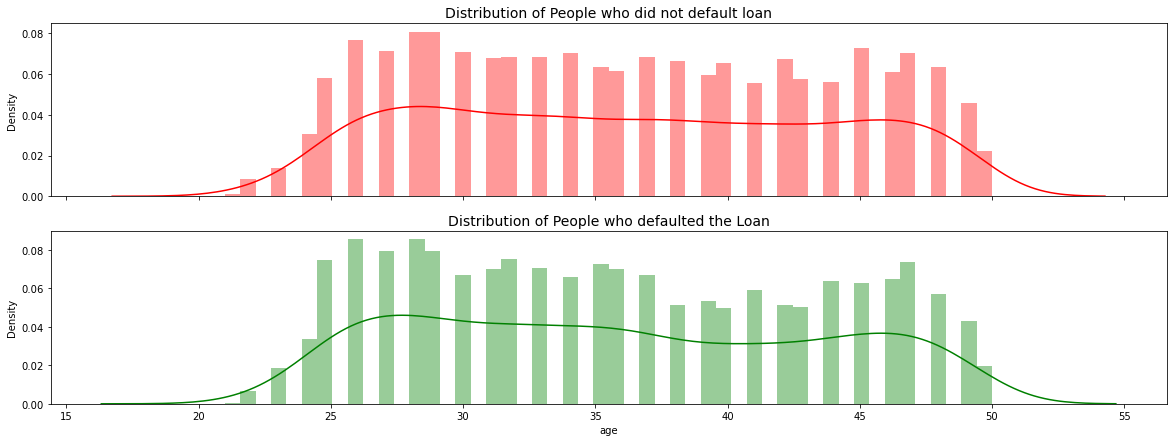

In [40]:
defaulter_age = data_train['age'][data_train['loan_default']== 1]
non_defaulter_age = data_train['age'][data_train['loan_default']== 0]
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = non_defaulter_age, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of People who did not default loan', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = defaulter_age, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of People who defaulted the Loan', size = 14)
plt.show()

In [41]:
data_train['no_of_curr_loans'].value_counts()

0     4220
2     1225
3      651
4      355
5      222
6      107
7       76
8       51
9       26
10      20
11      18
14       7
13       6
12       4
15       3
17       2
18       2
16       2
33       1
20       1
27       1
Name: no_of_curr_loans, dtype: int64

<AxesSubplot:xlabel='proof_submitted', ylabel='loan_default'>

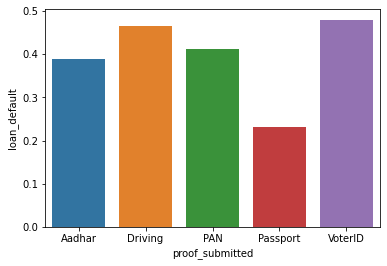

In [42]:
temp = data_train.groupby(by='proof_submitted').mean()
sns.barplot(data=temp,x=temp.index,y='loan_default')

In [78]:
data_train['proof_submitted'].value_counts()

Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: proof_submitted, dtype: int64

The people who submitted their passport as their proof are less likely to default on their payments. And also people who have given voter id or driving license also pose a higher risk of defaulting on their payments.

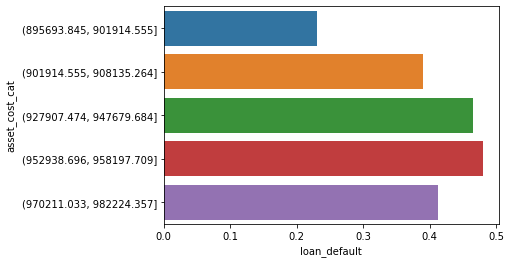

In [43]:
temp1 = temp.copy()
temp1['asset_cost_cat'] = pd.qcut(temp1.asset_cost, 8).astype('str')
temp['asset_cost_cat'] = pd.qcut(temp.asset_cost, 8).astype('str')
temp1 = temp1.groupby(by = 'asset_cost_cat').mean().reset_index().sort_values(by='asset_cost_cat')
sns.barplot(data = temp1,y = 'asset_cost_cat',x='loan_default');


<AxesSubplot:xlabel='no_of_curr_loans', ylabel='loan_default'>

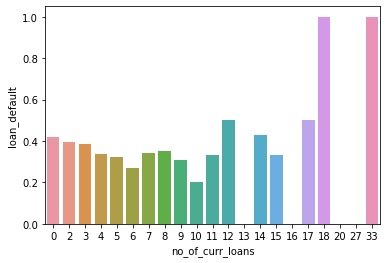

In [44]:
temp = data_train.groupby(by='no_of_curr_loans').mean()
sns.barplot(data=temp,x=temp.index,y='loan_default')

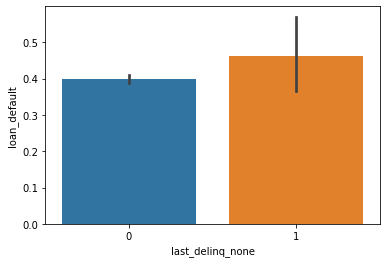

In [45]:
sns.barplot(data =data_train,x = 'last_delinq_none',y = 'loan_default');

The above graph shows that people who have history of defaulting on their payments tend to default more when compared to their counterparts.

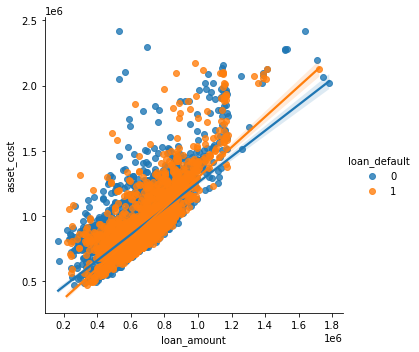

In [46]:
sns.lmplot(data=data_train,x='loan_amount',y='asset_cost',hue='loan_default')

In [47]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols(
    'loan_default ~ C(proof_submitted) + C(last_delinq_none) +\
    C(proof_submitted):C(last_delinq_none)', data=data_train).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(proof_submitted),4.00000,6.05761,1.51440,6.32843,0.00004
C(last_delinq_none),1.00000,0.38503,0.38503,1.60896,0.20468
C(proof_submitted):C(last_delinq_none),4.00000,0.74844,0.18711,0.78190,0.53675
Residual,6991.00000,1672.95559,0.23930,NaN,NaN


The ANOVA test shows us that the **last_delinq_none** has more effect on the target variable and the combined effect of both the categorical variables are affecting the result of the target variable.

Text(0.5, 1.0, 'Correlation between features')

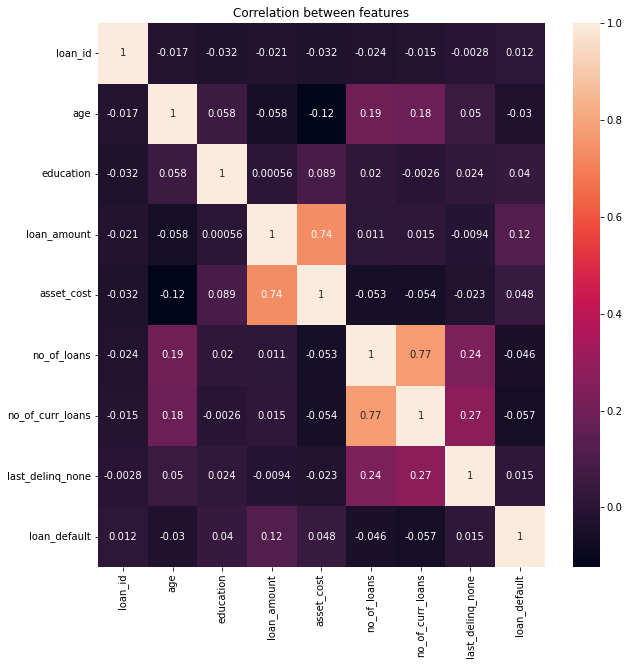

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(data_train.corr(), annot = True)
plt.title('Correlation between features')

**Observation:** 

- __Age ,no_of_loans and n0_of_curr_loans are negatively corelated with loan_default.__
- __asset_cost and last_declinq_none  are positively coorelated with loan_default.__


**Conclusion**

- 40% of the people who took loans from MyHom has defaulted in their payment.
- Younger people are more likely to default on their loans although the difference isn't wide.
- The people who submitted their passport as their proof are less likely to default on their payments.
- people who have given voter id or driving license also pose a higher risk of defaulting on their payments. 
- Higher the number of current loans the people have, more is the risk of default.
- People with history of default are more likely to default 

In [49]:
data_train.sample()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
727,728,33,1,Aadhar,666708,825948,2,2,0,1


In [50]:
data_train.dtypes

loan_id              int64
age                  int64
education            int32
proof_submitted     object
loan_amount          int64
asset_cost           int64
no_of_loans          int64
no_of_curr_loans     int64
last_delinq_none     int64
loan_default         int64
dtype: object

### **Encoding Categorical Features**

In [65]:
final_train = pd.get_dummies(data_train)

In [66]:
final_train.head()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_Aadhar,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,1,27,1,504264,820920,2,2,0,0,1,0,0,0,0
1,2,48,1,728556,831444,6,2,0,0,1,0,0,0,0
2,3,30,2,642936,826092,0,0,0,1,0,0,0,0,1
3,4,28,1,746556,930924,0,0,0,0,1,0,0,0,0
4,5,29,1,1139880,1902000,0,0,0,0,1,0,0,0,0


### **Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [83]:
x= final_train.drop('loan_default' , axis =1)
y=final_train['loan_default']

# **Model Development & Evaluation**

### Model evaluation based on simple train/test split using train_test_split() function

In [84]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [85]:
rfe = RFE(logreg, 13)                     ## create the RFE model and select 13 attributes
rfe = rfe.fit(x, y)
print('Selected features: %s' % list(x.columns[rfe.support_]))

Selected features: ['loan_id', 'age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'proof_submitted_Aadhar', 'proof_submitted_Driving', 'proof_submitted_PAN', 'proof_submitted_Passport', 'proof_submitted_VoterID']


In [138]:
selected_features = ['loan_id', 'age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'proof_submitted_Aadhar', 'proof_submitted_Driving', 'proof_submitted_PAN', 'proof_submitted_Passport', 'proof_submitted_VoterID']

x= final_train[selected_features]
y = final_train['loan_default']

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 40 , stratify = y)
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Validation Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (5250, 13) (5250,)
Validation Data Shape: (1750, 13) (1750,)


In [139]:
y_pred = logreg.predict(x_test)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+' F1 score : ',f1_score(y_test, y_pred, average='weighted'))
print(logreg.__class__.__name__+' precision score : ',precision_score(y_test, y_pred, average='weighted'))
print(logreg.__class__.__name__+' Recall Score : ', recall_score(y_test , y_pred, average='weighted'))

Train/Test split results:
LogisticRegression accuracy is 0.599
LogisticRegression F1 score :  0.4497320471596999
LogisticRegression precision score :  0.35986277873070327
LogisticRegression Recall Score :  0.5994285714285714


In [140]:
confusion_matrix(y_test,logreg.predict(x_test))

array([[1049,    1],
       [ 700,    0]], dtype=int64)

### Model evaluation based on Random Forest Classifier ( Baseline Model )

In [142]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [143]:
y_pred_test = model.predict(x_test)

In [144]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print('F1 score : ',f1_score(y_test, y_pred_test))
print('precision score : ',precision_score(y_test, y_pred_test))
print('Recall Score : ', recall_score(y_test , y_pred_test))

Accuracy score for test data is: 0.5737142857142857
F1 score :  0.332737030411449
precision score :  0.4449760765550239
Recall Score :  0.26571428571428574


In [162]:
from sklearn.metrics import classification_report
report = classification_report(y_test,model.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.61      0.78      0.69      1050
           1       0.44      0.27      0.33       700

    accuracy                           0.57      1750
   macro avg       0.53      0.52      0.51      1750
weighted avg       0.55      0.57      0.55      1750



###  Random Forest with RandomizedSearchCV ( Final Model )

In [149]:
params = {
    'max_depth':[5,10,20,30],
    'max_leaf_nodes':[16,32,64,128],
    'min_samples_leaf':[10,20,30,40,60,80]
}
final_model = RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1,random_state=42,
                                                                 class_weight='balanced'),
                                param_distributions=params,
                                 n_jobs = -1,
                                 random_state=42,
                                 scoring='roc_auc'
                                )
final_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, 30],
                                        'max_leaf_nodes': [16, 32, 64, 128],
                                        'min_samples_leaf': [10, 20, 30, 40, 60,
                                                             80]},
                   random_state=42, scoring='roc_auc')

In [150]:
train_preds = final_model.predict(x_test)
print(classification_report(y_test,final_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1050
           1       0.47      0.59      0.52       700

    accuracy                           0.57      1750
   macro avg       0.57      0.58      0.57      1750
weighted avg       0.59      0.57      0.58      1750



In [152]:
y_pred_test1 = final_model.predict(x_test)

In [153]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))
print('F1 score : ',f1_score(y_test, y_pred_test1))
print('precision score : ',precision_score(y_test, y_pred_test1))
print('Recall Score : ', recall_score(y_test , y_pred_test1))

Accuracy score for test data is: 0.5725714285714286
F1 score :  0.5247776365946633
precision score :  0.47254004576659037
Recall Score :  0.59


In [155]:
f1_dict = {'Baseline Model':f1_score(y_test, y_pred_test), 
                  'Final Model':f1_score(y_test, y_pred_test1)}          # Predicting best model on basis of f1 score           

In [163]:
f1 = pd.DataFrame(f1_dict, index=['F1 Scores'])
f1

,Baseline Model,Final Model
F1 Scores,0.33274,0.52478


In [160]:
final_test['loan_default'] = final_model.predict(final_test[Selected_features])
final_test['loan_id'] = data_test['loan_id']

sample = final_test[['loan_id','loan_default']]

sample.to_csv("sample.csv", index=False)

sample.tail()

,loan_id,loan_default
2995,9996,0
2996,9997,1
2997,9998,0
2998,9999,1
2999,10000,0


In [161]:
sample.shape

(3000, 2)